# Importing all the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Reading the dataset

In [2]:
df=pd.read_csv('labeled_data.csv')

# Understanding Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

# Analysis of the Labels 

<Axes: xlabel='class', ylabel='count'>

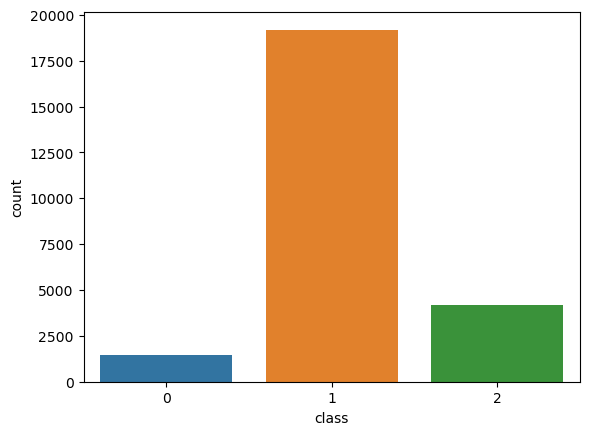

In [6]:
sns.countplot(x='class', data=df)

# Analysis of Most words used in the text

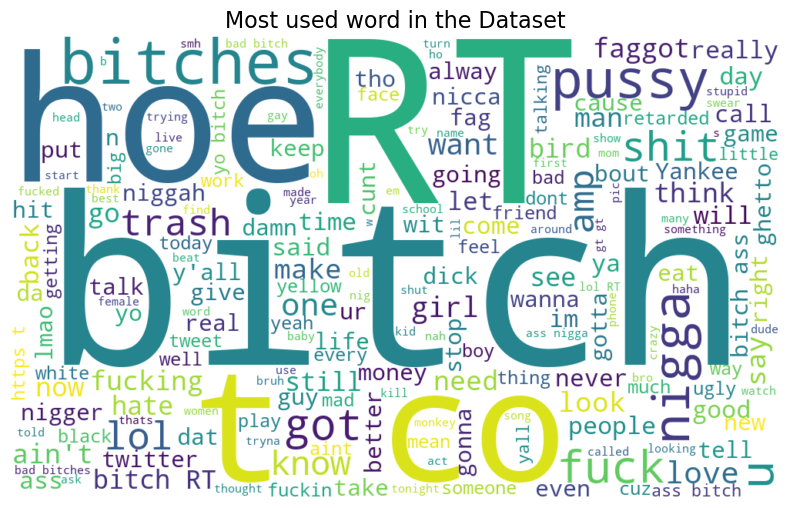

In [7]:
all_text = " ".join(df['tweet'])

# Create WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Most used word in the Dataset", fontsize=16)
plt.show()

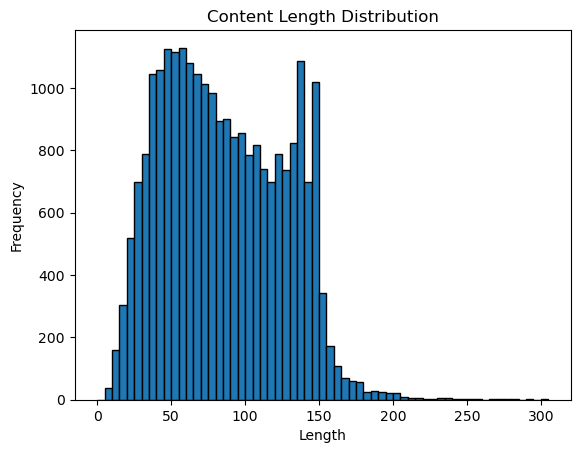

In [9]:
df['content_length'] = df['tweet'].apply(len)

# Plot histogram with bins of size 10 up to 300
plt.hist(df['content_length'], bins=range(0, 310, 5), edgecolor='black')

# Set the title and labels
plt.title("Content Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")

# Display the plot
plt.show()


In [10]:
df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))
print('Information about Length of text')
print(df['word_count'].describe())


Information about Length of text
count    24783.000000
mean        14.117016
std          6.825525
min          1.000000
25%          9.000000
50%         13.000000
75%         19.000000
max         52.000000
Name: word_count, dtype: float64


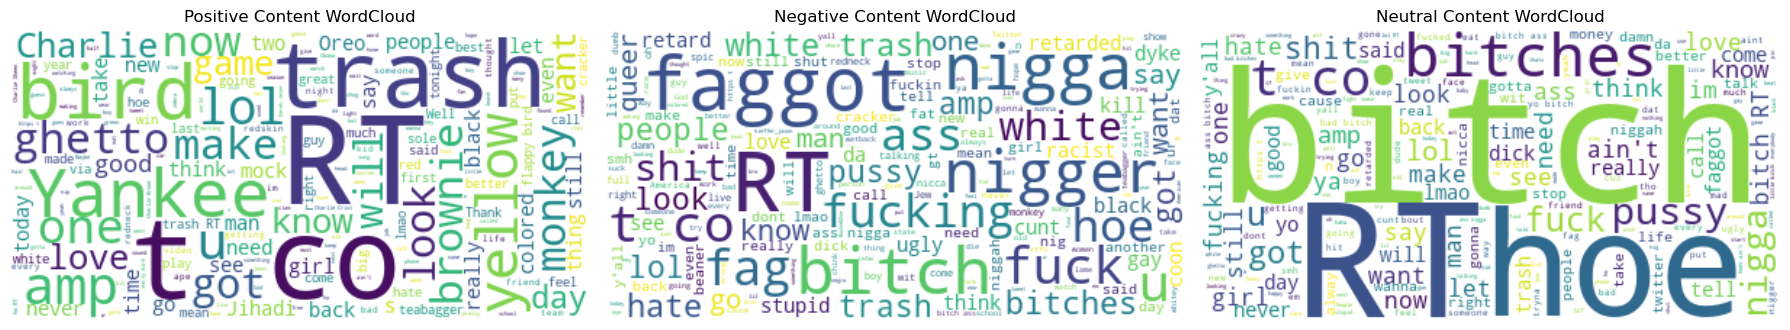

In [12]:
positive_text = " ".join(df[df['class'] == 2]['tweet'])
negative_text = " ".join(df[df['class'] == 0]['tweet'])
neutral_text = " ".join(df[df['class'] == 1]['tweet'])  # Added neutral text

# Generate word clouds
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)
neutral_wordcloud = WordCloud(background_color='white').generate(neutral_text)  # Generate neutral word cloud

# Set up the matplotlib plot with 3 subplots
plt.figure(figsize=(18, 6))  # Increased figure size for 3 subplots

# Positive WordCloud
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Positive Content WordCloud")

# Negative WordCloud
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Negative Content WordCloud")

# Neutral WordCloud
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Neutral Content WordCloud")

# Show the plot
plt.tight_layout()
plt.show()


In [14]:
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['tweet'].apply(lambda x: len(str(x)))

In [16]:
correlations = df[['word_count', 'char_count', 'class']].corr()
correlations['class']

word_count    0.046572
char_count    0.084923
class         1.000000
Name: class, dtype: float64

       word_count  char_count
class                        
0       13.906993   84.586713
1       13.958624   83.457113
2       14.919289   94.850108


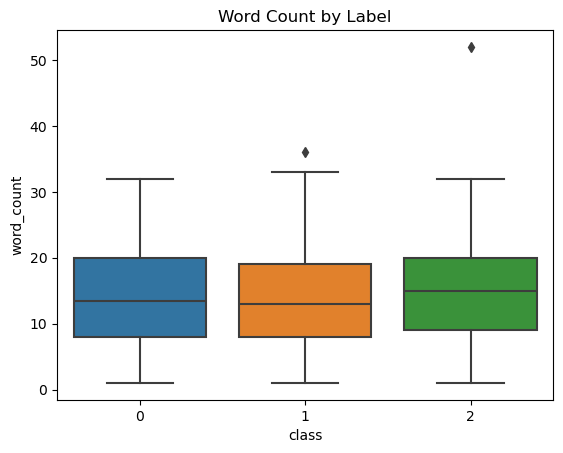

In [18]:
print(df.groupby('class')[['word_count', 'char_count']].mean())
sns.boxplot(x='class', y='word_count', data=df)
plt.title("Word Count by Label")
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

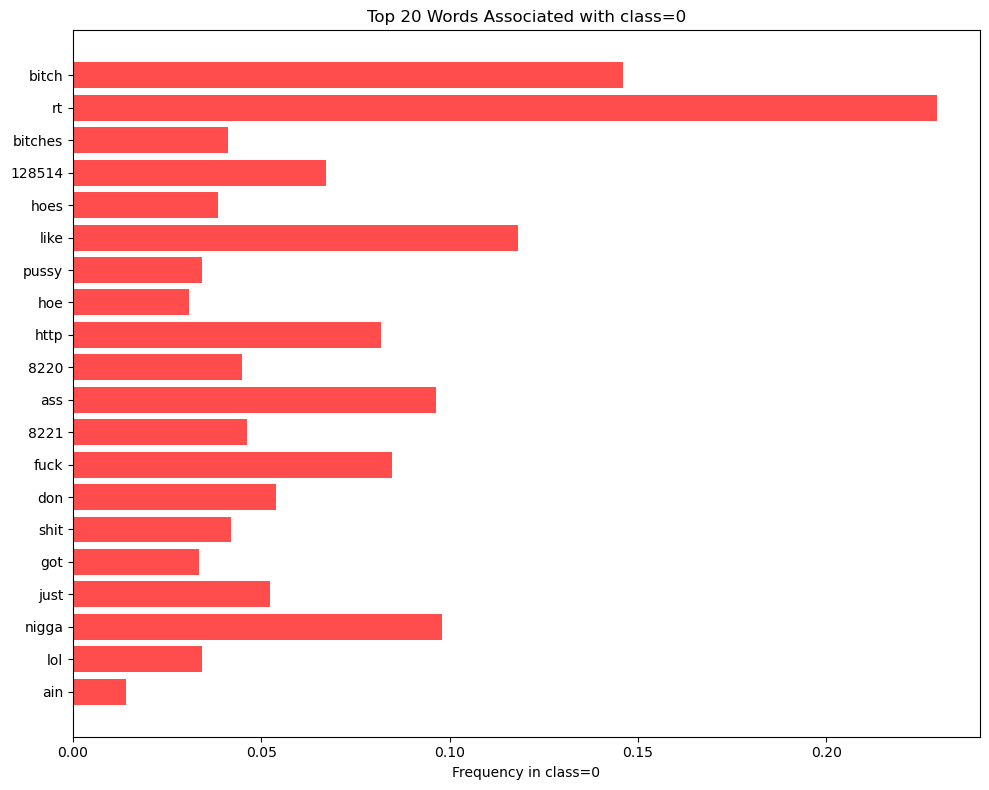

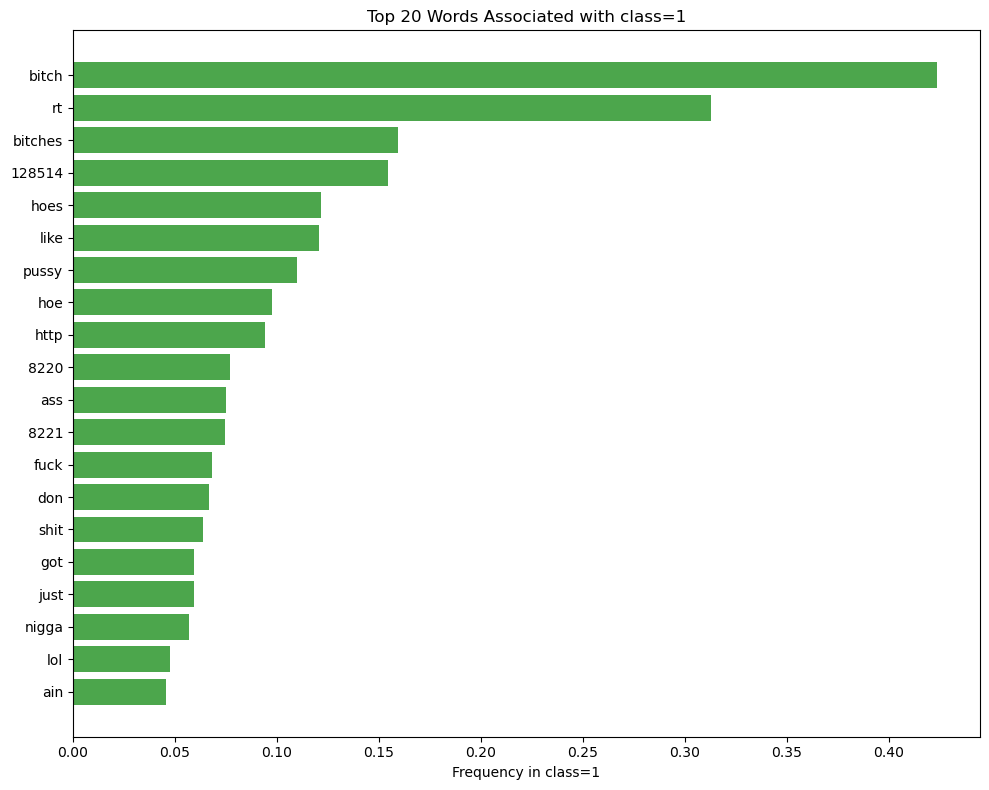

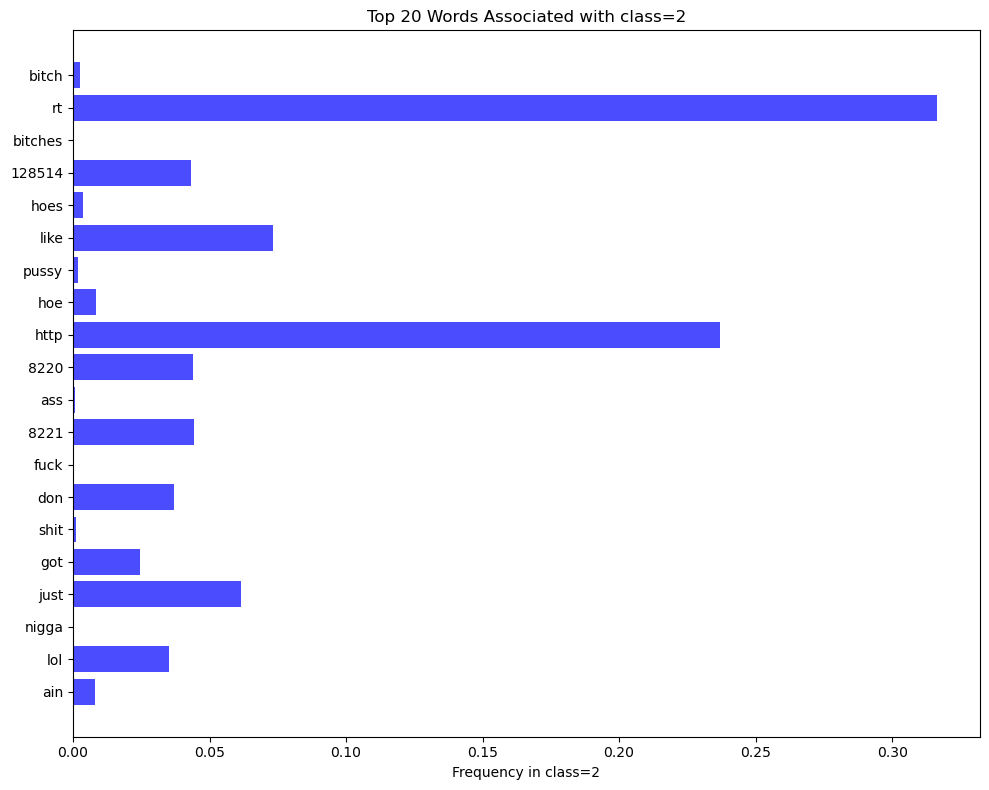

In [22]:
vectorizer = CountVectorizer(max_features=100, stop_words='english')  # Ignore common stop words
word_matrix = vectorizer.fit_transform(df['tweet'])  # Using 'tweet' column
top_words = vectorizer.get_feature_names_out()

# Create a DataFrame for word occurrences
word_features = pd.DataFrame(word_matrix.toarray(), columns=top_words)
word_features['class'] = df['class']  # 'class' column instead of 'Label'

# Step 2: Calculate word frequency for class=0, class=1, and class=2
word_freq_class0 = word_features[word_features['class'] == 0].drop('class', axis=1).sum() / len(word_features[word_features['class'] == 0])
word_freq_class1 = word_features[word_features['class'] == 1].drop('class', axis=1).sum() / len(word_features[word_features['class'] == 1])
word_freq_class2 = word_features[word_features['class'] == 2].drop('class', axis=1).sum() / len(word_features[word_features['class'] == 2])

# Combine results into a DataFrame for comparison
word_effect = pd.DataFrame({
    'Word': top_words,
    'Frequency_class0': word_freq_class0,
    'Frequency_class1': word_freq_class1,
    'Frequency_class2': word_freq_class2
}).sort_values(by='Frequency_class1', ascending=False)

# Step 3: Visualize the effect of words on class=0, class=1, and class=2
plt.figure(figsize=(10, 8))
plt.barh(word_effect['Word'].head(20), word_effect['Frequency_class0'].head(20), color='red', alpha=0.7)
plt.title("Top 20 Words Associated with class=0")
plt.xlabel("Frequency in class=0")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.barh(word_effect['Word'].head(20), word_effect['Frequency_class1'].head(20), color='green', alpha=0.7)
plt.title("Top 20 Words Associated with class=1")
plt.xlabel("Frequency in class=1")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.barh(word_effect['Word'].head(20), word_effect['Frequency_class2'].head(20), color='blue', alpha=0.7)
plt.title("Top 20 Words Associated with class=2")
plt.xlabel("Frequency in class=2")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
